# Asignación de columnas en cadena de métodos🐼
El método ```.assign()``` permite crear __nuevas__ columnas o __sobreescribir__ existentes y __devolver__ un nuevo DataFrame con los cambios, dejando el original intacto.

In [1]:
import numpy as np
import pandas as pd

# 1.Asignación directa🖥️

In [10]:
#🌸Datos de dataset Iris
iris = pd.read_csv("../../../data/raw/iris_DataSet.csv")
# Con df.head() de forma predetermianda se muestra los 5 primera filas del data Frame
print('DafaFrame iris creado a partir de la lectura de un CSV:')
display(iris)
print('Cinco primero elementos del DataFrame "iris":')
display( iris.head() )

DafaFrame iris creado a partir de la lectura de un CSV:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Cinco primero elementos del DataFrame "iris":


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.1. Asignación con valores directos (requiere referencia a "iris")

In [11]:

iris_directo = iris.assign(sepal_ratio = iris["sepal_width"] / iris["petal_width"])
print('DataFrame nuevo con una nueva columna "sepal_ratio" creada de manera directa:')
print(iris_directo)
print('=' * 80)
print(f'Podemos ver solo las dos primera filas:')
print(iris_directo.head(2))

DataFrame nuevo con una nueva columna "sepal_ratio" creada de manera directa:
     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     sepal_ratio  
0      17.500000  
1      15.000000  


### 1.1. Asignación con LABMDA (Recomendado para cadenas)

In [12]:
iris_lambda = iris.assign(sepal_ratio = lambda x : x["sepal_width"] / x["petal_length"] )
print('Dataframe Nuevo creado con una nueva columna "sepal_ratio" creado con una función lambda:')
print(iris_lambda)
print('=' * 70)
#Podemos seleccionar una columna y la cantidad de elementos para mostrar
print('Mostrando los cuatro primeros elementos de la columna "sepal_width" :')
print(iris_lambda['sepal_width'].head(4))

Dataframe Nuevo creado con una nueva columna "sepal_ratio" creado con una función lambda:
     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     sepal_ratio  
0       2.500000  
1      

## 2. El poder del encadenamiento de métodos (method chaining)
Sirve para filtrar datos y luego calcular una nueva columna sobre esos datos filtrados.

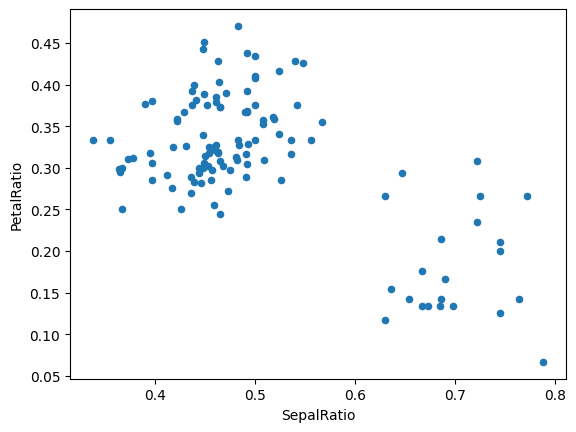

In [15]:
resultado = (
    iris
    #2.1. Primero filtramos los valores de la columna SepalLength mayores a 5
    .query("sepal_length > 5") 
    #2.2. Luego, calculamos columnas nuevas BASADAS en el DataFrame ya filtrado
    .assign(
        #La "x" dentro del  lambda no es el DF iris orignal completo,  si no e subconjunto de datos que pasó el filtro de query
        SepalRatio = lambda x: x.sepal_width / x.sepal_length,
        PetalRatio = lambda x: x.petal_width / x.petal_length
    )
    .plot(kind = "scatter", x = "SepalRatio", y="PetalRatio")
)

In [16]:
#Serie de listas
serie = {
    "Columna_A": [1, 2, 3],
    "Columna_B": [4, 5, 6]    
}

dfa = pd.DataFrame(serie)
print(f'DataFrame original:\n{dfa}')
print('=' * 50)
dfa_nuevo = dfa.assign(Columna_C = lambda x: x["Columna_A"] + x["Columna_B"], Columna_D = lambda x: x["Columna_A"] + x["Columna_C"])
print(f'DataFrame nuevo:\n{dfa_nuevo}')

DataFrame original:
   Columna_A  Columna_B
0          1          4
1          2          5
2          3          6
DataFrame nuevo:
   Columna_A  Columna_B  Columna_C  Columna_D
0          1          4          5          6
1          2          5          7          9
2          3          6          9         12
